# Assignment 2 

DSP AND MIDI 
------------------

In this assignment we will explore some fundamental DSP concepts 
to better understand the concepts we covered in class. In addition, 
we will look into the MIDI communication protocol and file format for 
controlling synthesizers and storing performance information. 

Similarly to the first assignment I will use the term familiar programming 
language to refer to the ones that you probably have encountered during your 
studies: Python, C, C++, Java, and Javascript. As you probably can guess I will use the
term unfamiliar programming language to refer to any other programming
language such as: Haskell, OCaml, Prolog, Rust, Go, Julia, Ruby, C#, F#
R, etc. I will use the term computer music textual languages to refer to languages 
that have extensive support and primitives for sound and music manipulation such as 
Chuck, Supercollider, Csound, Nyquist, and Faust and visual programming languages 
for languages such as PureData and Max/MSP. 

Unless explicitly stated you can use any programming languages for implementing 
the questions. Using a computer music language moves the degree of difficulty down and using an unfamiliar programming language moves it up. For example if you implement question 6 in Max/MSP or Chuck it counts as basic rather than expected. If you implement question 6 in an unfamiliar programming languages it can count as advanced. In general, I am flexible so if you want to adjust things just let me know. Also if you 
think of a question of comparable difficulty that you would like do again let me know and most likely 
it should be ok. 

If you need access to devices ask me via email or through Discord for 
access to ECS602. 

In [1]:
import random
import numpy as np
import IPython.display as ipd
import math
import matplotlib.pyplot as plt

1. (Basic) **MIDI to MIDI communication**  Connect directly using MIDI two hardware devices without going through a computer (sometimes this is termed a DAWLESS setup). Write a short text description of which devices you connected and what issues you had to figure out. You will need to read a bit about MIDI input, output, and cables. A classic example could be connecting a MIDI keyboard and generating sound in a different keyboard or rack-mount synthesizer but it does not have to be a keyboard or synthesizers as long as it is clear you have 
two devices communicating with each other. 

<span style="color:red">Need to go to the lab :( </span>

2. (Basic) **COMPLEX NUMBER MULTIPLICATION**  Show using a figure, programming, and math what is the result multiplying the complex number $(2+j)$ with $j$. For programming, represent the complex number as an array, list, or tuple and directly implement the complex number multiplication in terms of real and imaginary parts without using any built-in libraries or types for complex numbers. 

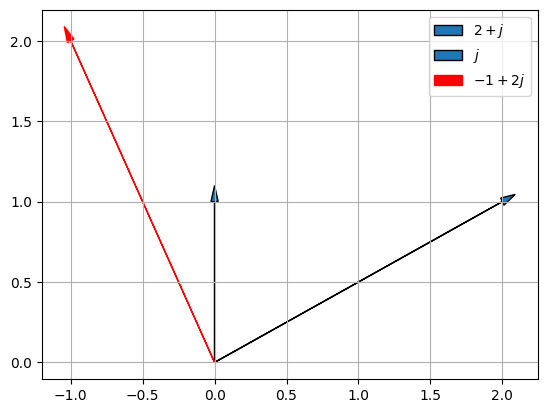

In [2]:
# figure (circle)
ax = plt.axes()
ax.arrow(0, 0, 2, 1, head_width=0.05, head_length=0.1, label=r'$2+j$')
ax.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.1, label=r'$j$')
ax.arrow(0, 0, -1, 2, head_width=0.05, head_length=0.1, label=r'$-1+2j$', color='red')
plt.grid()
plt.legend()
plt.show()

In [3]:
# programming
def complex_mul(a, b):
    (r1, i1) = a
    (r2, i2) = b
    return (r1 * r2 - i1 * i2, r1 * i2 + r2 * i1)

complex_mul((2, 1), (0, 1))

(-1, 2)

<span style="color:red">
Math: $(2 + j)j = -1 + 2j$
</span>

3. (Basic) **MIDI to COMPUTER** Connect a hardware MIDI device to your laptop or desktop. Write code that prints out MIDI messages whenever they are received. Some devices can connect directly through USB, there are cheap USB to MIDI converters or you can go through an audio interface that has MIDI functionality. Similarly to question 1, just document your experience, what challenges you encountered, and what you learned. 

<span style="color:red"> Need to go to the lab</span>

4. (Basic) **Amplitude Estimation in Mixtures** Create one second of audio by summing the following sinusoidal frequencies ($100Hz, 200Hz, 300Hz$) all with the same phase, and three random amplitudes between $0.0$ and $1.0$. Listen to the generated sound and create 4 plots one for each individual sinusoid and one for the resulting mixed sound. Each plot should correspond to the time duration of one period of the lowest sinusoid ($100Hz$). Show how you can estimate these three random amplitudes by taking the dot product of the mixture with basis sinusoids of amplitude 1 for the three frequencies ($100Hz, 200Hz, 300Hz$). 

In [4]:
srate = 44100

def sinusoid(freq, amp, duration=1):
    t = np.linspace(0,duration,srate*duration)
    return amp*np.sin(2*np.pi*freq*t)

In [5]:
amp1 = random.random()
amp2 = random.random()
amp3 = random.random()
s1 = sinusoid(100, amp1)
s2 = sinusoid(200, amp2)
s3 = sinusoid(300, amp3)

combine = np.add(s1, s2)
combine = np.add(combine, s3)

ipd.Audio(combine,rate=srate)

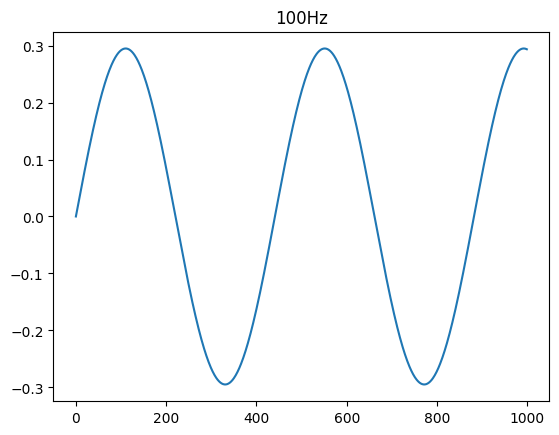

In [6]:
plt.title("100Hz")
plt.plot(s1[:1000])

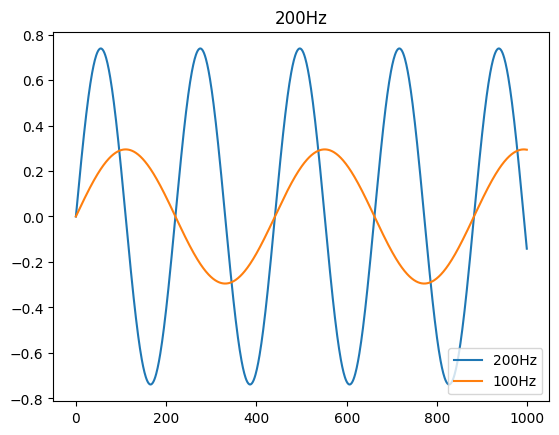

In [7]:
plt.title("200Hz")
plt.plot(s2[:1000], label="200Hz")
plt.plot(s1[:1000], label="100Hz")
plt.legend()

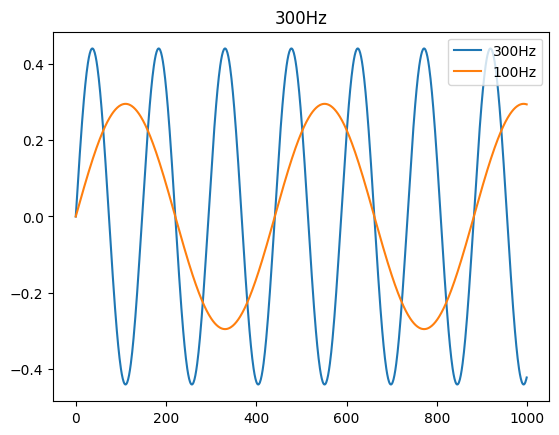

In [8]:
plt.title("300Hz")
plt.plot(s3[:1000], label="300Hz")
plt.plot(s1[:1000], label="100Hz")
plt.legend()

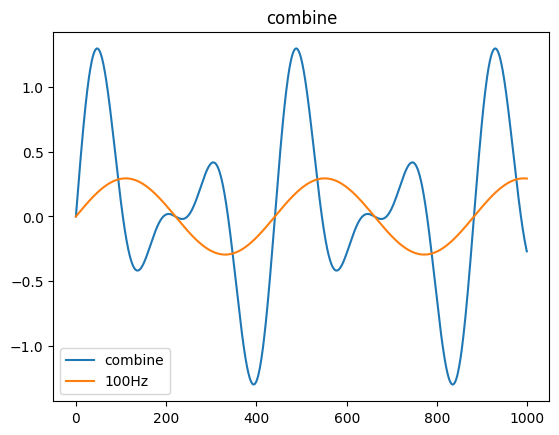

In [9]:
plt.title("combine")
plt.plot(combine[:1000], label="combine")
plt.plot(s1[:1000], label="100Hz")
plt.legend()

In [10]:
def dot_amplitude(data1, data2): 
    dot_product = np.dot(data1, data2)
    return 2 * (dot_product / len(data1))

Dot product amplitude = 0.09


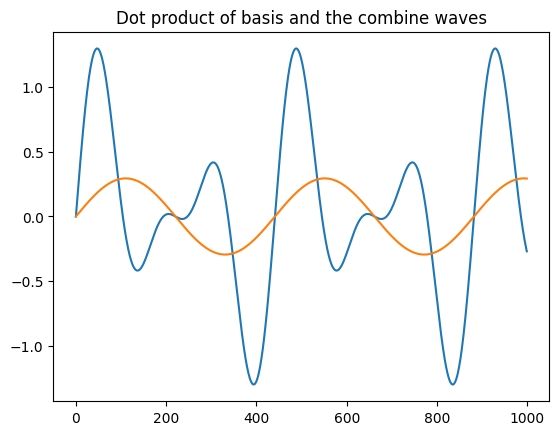

In [11]:
print('Dot product amplitude = %2.2f' % dot_amplitude(s1, combine))
plt.figure()
plt.title("Dot product of basis and the combine waves")
plt.plot(combine[:1000])
plt.plot(s1[:1000])

5. (Expected) **Amplitude and Phase Estimation in Mixture** This is an extension of question 4. Extend your code from question 4 so that the three sinusoidal components have random phases in addition to random amplitudes. Listen to the generated sound and create 4 plots one for each individual sinusoid and one for the resulting mixed sound. Each plot should correspond to the time duration of one period of the lowest sinusoid ($100Hz$). Show how the amplitudes and phases can be estimated for this sound in two ways: a) by brute force checking even possible phase value and selecting that one that results in the highest dot product with a basis sinusoid of the appropriate frequency b) by taking the dot product of the mixture with a sine component and a cosine component. 

In [12]:
def sinusoid_with_phase(freq, amp, phase, duration=1):
    t = np.linspace(0,duration,srate*duration)
    return amp*np.sin(2*np.pi*freq*t + phase)

In [13]:
amp1, amp2, amp3 = random.random(), random.random(), random.random()
phase1, phase2, phase3 = 2*math.pi/random.randint(1, 10), 2*math.pi/random.randint(1, 10), 2*math.pi/random.randint(1, 10)
s1 = sinusoid_with_phase(100, amp1, phase1)
s2 = sinusoid_with_phase(200, amp2, phase2)
s3 = sinusoid_with_phase(300, amp3, phase3)

combine = np.add(s1, s2)
combine = np.add(combine, s3)

ipd.Audio(combine,rate=srate)

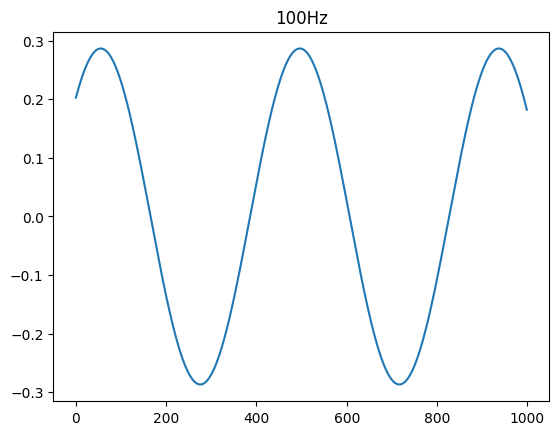

In [14]:
plt.title("100Hz")
plt.plot(s1[:1000])

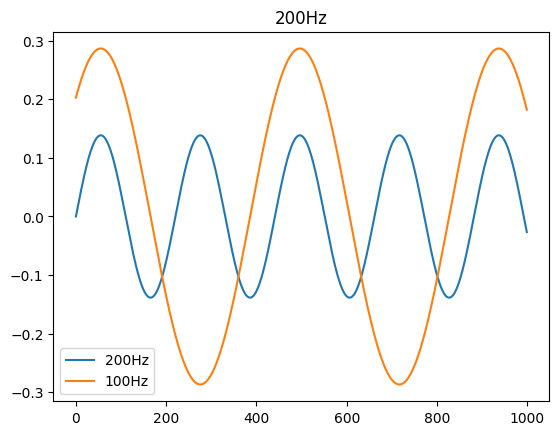

In [15]:
plt.title("200Hz")
plt.plot(s2[:1000], label="200Hz")
plt.plot(s1[:1000], label="100Hz")
plt.legend()

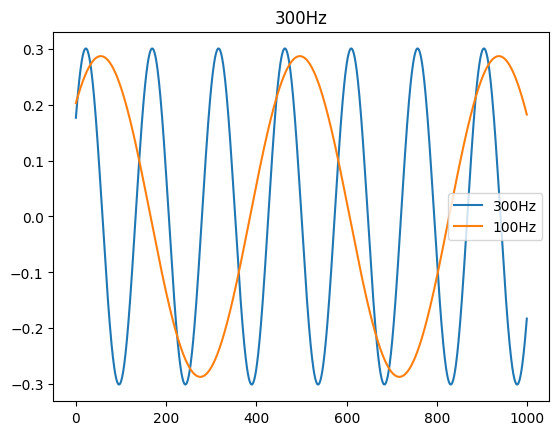

In [16]:
plt.title("300Hz")
plt.plot(s3[:1000], label="300Hz")
plt.plot(s1[:1000], label="100Hz")
plt.legend()

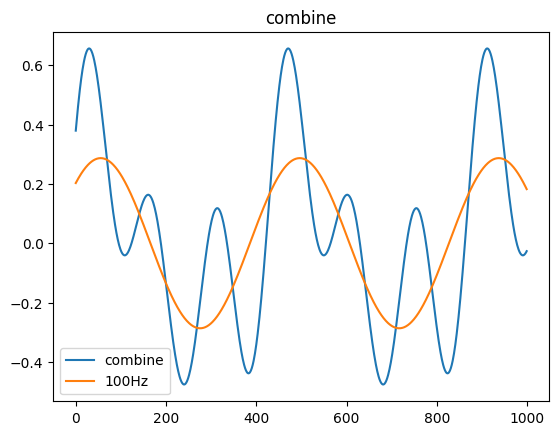

In [17]:
plt.title("combine")
plt.plot(combine[:1000], label="combine")
plt.plot(s1[:1000], label="100Hz")
plt.legend()

In [24]:
# a) Estimate amplitudes and phases by brute force
phases = [2*math.pi/x for x in range(1, 10)]
sinusoid_phases = map(lambda p: (sinusoid_with_phase(100, amp1, p), p), phases)
dot_products = map(lambda s: (dot_amplitude(s[0], combine), s[1]), sinusoid_phases)
(est_amp, est_phase) = max(dot_products, key=lambda x:x[0])
print(f'Estimated amplitude: {est_amp}')
print(f'Estimated phase: {est_phase}')

Estimated amplitude: 0.08227927107905965
Estimated phase: 0.7853981633974483


In [27]:
# b) by taking the dot product of the mixture with a sine component and a cosine component.
basis_sin = sinusoid_with_phase(100, 1, 0)
basis_cos = sinusoid_with_phase(100, 1, np.pi/2)

a = dot_amplitude(combine, basis_sin)
b = dot_amplitude(combine, basis_cos)
est_phase = np.arctan(b/a)
est_amp = np.sqrt(a*a+b*b)
print(f'Estimated amplitude: {est_amp}')
print(f'Estimated phase: {est_phase}')

Estimated amplitude: 0.28684646781217893
Estimated phase: 0.785440586517028


<span style="color:red">a and b method have the same phase result, but different amplitude</span>

6. (Expected) **MIDI Arpeggiator** Write a MIDI arepggiator. First you will need to have code for writing MIDI messages and a device for playing sound. For this question you can use software synthesizers or other software for the sound generation pehraps you simple synth from the previous assignment i.e you don't need a hardware MIDI device. The input to the arpeggiator will be a set of MIDI note numbers, a tempo, and a mode (up, down, up/down, random) and the output will be repeating patterns of MIDI note messages that when played by a software synthesizer correspond to the arpeggiated notes. 

7. (Expected) **EQUAL TEMPERAMENTS** Write code to generate a simple note of an arbitrary frequency - the note should have a simple ADSR envelope and not be a simple sine wave. Using this code play "scales" i.e all the notes going up and down for different equal temperament tuning systems. Generate scales for the following 3-equal temperament, 4-equal temperament, 5-equal temperament, ..., 12-equal temperament. Use 110Hz as your first note and in addition to the scale going up and down play a fixed drone throughout at 110Hz using a continuous version of the same "instrument" i.e it has only an attack and sustain but no release until the full scale is played. Briefly comment on what you hear for the different systems. 

8. (Expected) **COMPLEX NUMBER PLOTTING** Write code that takes as input a time in minutes and seconds and converts that to two complex numbers corresponding to the positions of the minute hand and second hand on a clock. What complex number do we need to multiply a particular second hand position to move by one second (clockwise)? What complex number of we need to multiply to move by one second (counter-clockwise). Show your answer by creating a corresponding plot. 

You only need to implement 2 out of the 4 advanced questions. They are intentionally not specified in detail as there is considerable room for individual variations. 

9. (Advanced) **MIDI STEP SEQUENCER** Write a MIDI step sequencer. You sequencer should at least support recording, playback, tempo, and multiple tracks. 

10. (Advanced) **DRUM MACHINE** Write a drum machine that allows the user to create rhythms using step-sequencing. Use samples from the freesound website for the different drum kit sounds or synthesize them if you prefer. 

11. (Advanced) **SIMPLE SUBTRACTIVE SYNTHESIZER** Read about and implement a BiQuad filter. Use the filter to process noise and experiment a bit with the frequency and bandwidth (Q) controls as well as an envelope on the resulting sound. Play a simple melody by simply adjusting the frequency and envelopes of the filter as it is proceesing noise. 

12. (Advanced) **RETRO GAME SOUND ENGINE**  Old arcade machines, game consoles, and computers used programmable sound generator chips which were based on synthesizer technology to create music. https://en.wikipedia.org/wiki/Chiptune
Either read about an existing chip or create a simple one on your own and try to write some interesting chiptune music with it. You already have a lot of the building components from this and the previous assignment. 